# Aprendizaje Automatico: Redes Neuronales MLP

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Data Original

In [3]:
data = pd.read_csv("DATA_SIR.csv", header=None)
data = data.rename(columns={0: 'N', 1:'V0', 2:'Rcont', 3:'fS_average', 4:"fI_average", 5:'fR_average'})
data['V0'] = data['V0'].astype(int)
data.head()

,N,V0,Rcont,fS_average,fI_average,fR_average
0,50,10,2.0,0.979800,0.020008,0.020200
1,80,10,2.0,0.987000,0.012561,0.013000
2,110,10,2.0,0.990000,0.009557,0.010000
3,140,10,2.0,0.991643,0.007501,0.008357
4,170,10,2.0,0.992118,0.006463,0.007882


# Valores de P y R (Distribucion de datos)

In [3]:
data['p'] = data['N'] / (50^2)
data['r'] = (data['p']*data['V0']*data['Rcont'])
data

,N,V0,Rcont,fS_average,fI_average,fR_average,p,r
0,50,10,2.0,0.979800,0.020008,0.020200,1.041667,20.833333
1,80,10,2.0,0.987000,0.012561,0.013000,1.666667,33.333333
2,110,10,2.0,0.990000,0.009557,0.010000,2.291667,45.833333
3,140,10,2.0,0.991643,0.007501,0.008357,2.916667,58.333333
4,170,10,2.0,0.992118,0.006463,0.007882,3.541667,70.833333
...,...,...,...,...,...,...,...,...
995,200,30,3.0,0.000000,0.656133,1.000000,4.166667,375.000000
996,230,30,3.0,0.000000,0.699460,1.000000,4.791667,431.250000
997,260,30,3.0,0.000000,0.736043,1.000000,5.416667,487.500000
998,290,30,3.0,0.000000,0.745190,1.000000,6.041667,543.750000


## Datos de la $f_I$

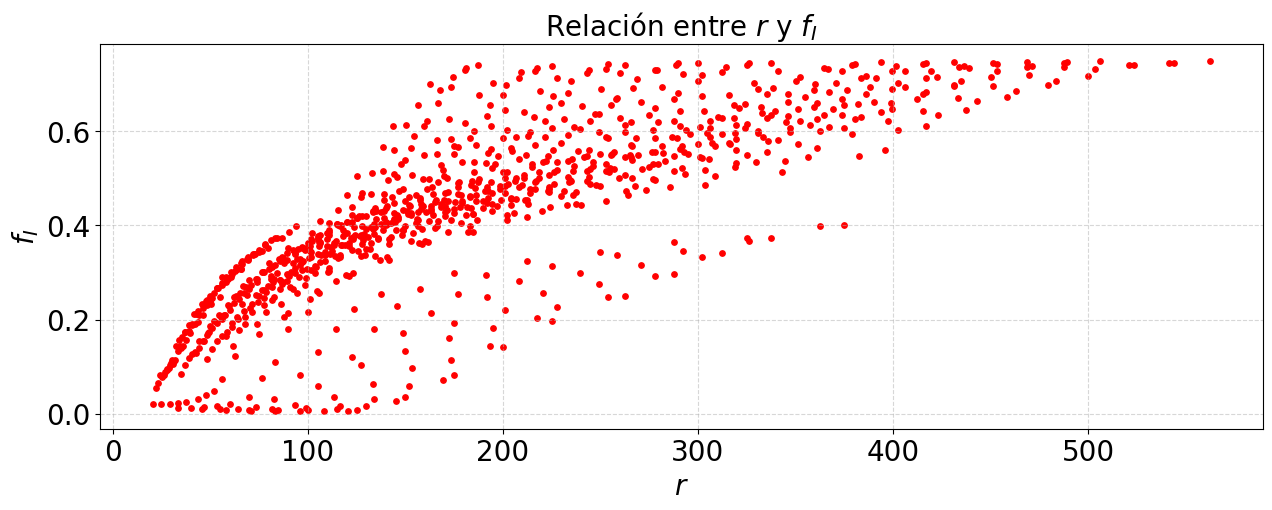

In [4]:
plt.figure(figsize=(15, 5))
plt.scatter(data['r'], data['fI_average'], s=15, color='red')
plt.title('Relación entre $r$ y $f_I$', fontsize=20)
plt.xlabel('$r$', fontsize=20)
plt.ylabel('$f_I$', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(labelsize=20)
plt.savefig('grafico_fI_r.svg', format='svg')
plt.show()

## Datos de la $f_S$

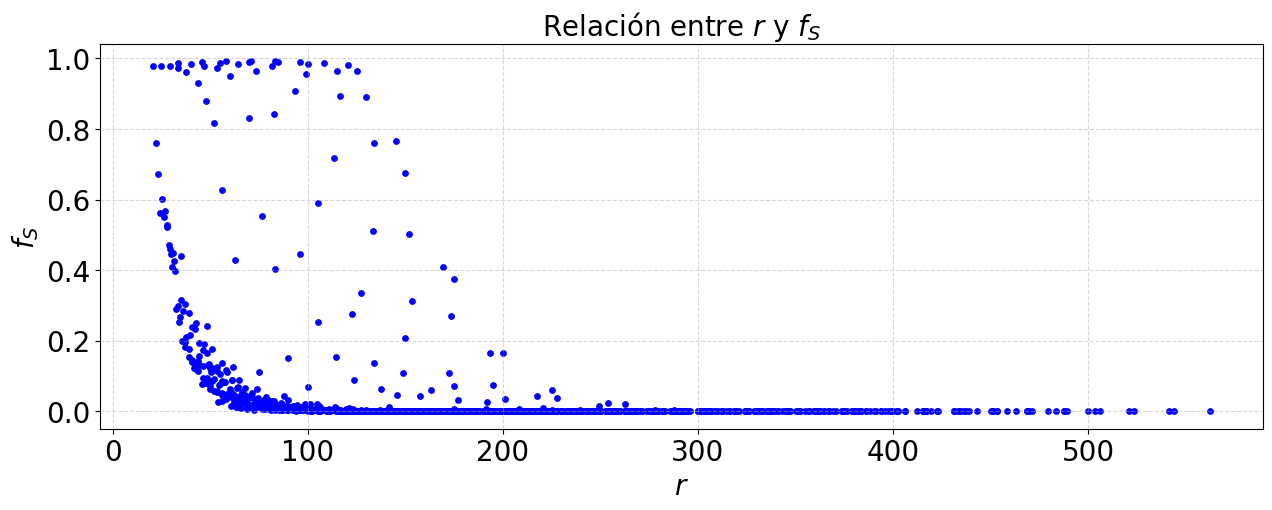

In [5]:
plt.figure(figsize=(15, 5))
plt.scatter(data['r'], data['fS_average'], s=15, color='blue')
plt.title('Relación entre $r$ y $f_S$', fontsize=20)
plt.xlabel('$r$', fontsize=20)
plt.ylabel('$f_S$', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(labelsize=20)
plt.savefig('grafico_fI_r.svg', format='svg')
plt.show()


# Visualización de los datos originales: Heatmap para $R_{cont} = 2$ 
##### Para la visualización de los datos estamos creando diferentes dataframes dependiendo el valor del radio de contagio $R_{cont}$, es por eso que las celdas de código deben ejecutarse en orden para ver el gráfico correspondiente.

# $f_I$ y $f_S$

In [11]:
dataf = data[data['Rcont'] == 2]
dataf['N'] = dataf['N'].round(decimals=1)
dataf['V0'] = dataf['V0'].round(decimals=1)
dataf = dataf.sort_values(by='V0', ascending=False) #V0 invertido
dataheatmap = dataf.pivot_table(values='fI_average', index='V0', columns='N')
dataheatmap

N,50,80,110,140,170,200,230,260,290,300
V0,,,,,,,,,,
10,0.020008,0.012561,0.009557,0.007501,0.006463,0.005972,0.005401,0.005495,0.005827,0.008331
12,0.020541,0.013003,0.009892,0.008101,0.007174,0.007312,0.010165,0.017065,0.027965,0.035545
14,0.021049,0.015424,0.011181,0.010666,0.013101,0.017429,0.030549,0.058048,0.072437,0.083059
16,0.022659,0.016704,0.014934,0.019595,0.036550,0.063957,0.098150,0.113808,0.143030,0.141278
18,0.025765,0.021576,0.031000,0.058060,0.103542,0.132983,0.160905,0.183168,0.202995,0.198047
21,0.030874,0.036054,0.082192,0.121502,0.170747,0.192185,0.219482,0.225765,0.248985,0.249383
23,0.038985,0.075755,0.131175,0.179864,0.214526,0.247815,0.257067,0.276394,0.293364,0.296579
25,0.048502,0.109543,0.180460,0.229772,0.253911,0.283108,0.299038,0.315927,0.333811,0.340711
27,0.074211,0.180941,0.222558,0.265718,0.295415,0.314035,0.337170,0.345972,0.367545,0.373558


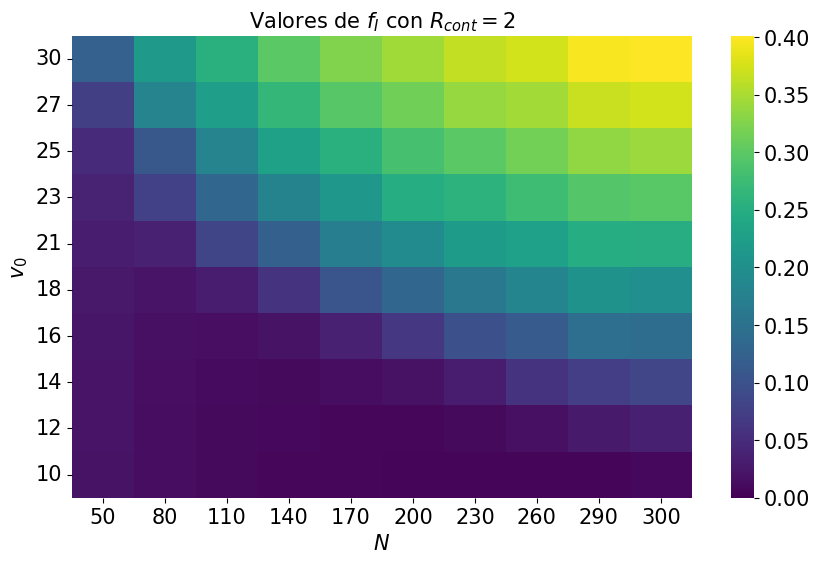

In [10]:
dataheatmap_sorted = dataheatmap.sort_index(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
heatmap=sns.heatmap(dataheatmap_sorted, cmap='viridis', vmin=0)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
plt.xlabel('$N$', fontsize=15)
plt.ylabel('$v_0$', fontsize=15)
plt.title('Valores de $f_I$ con $R_{cont} = 2$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(rotation=0, fontsize=15)
plt.savefig('fI_original_rcont2.svg', format='svg')
plt.show()

In [14]:
dataf = data[data['Rcont'] == 2]
dataf['N'] = dataf['N'].round(decimals=1)
dataf['V0'] = dataf['V0'].round(decimals=1)
dataf = dataf.sort_values(by='V0', ascending=False) #V0 invertido
dataheatmap = dataf.pivot_table(values='fS_average', index='V0', columns='N')
dataheatmap

N,50,80,110,140,170,200,230,260,290,300
V0,,,,,,,,,,
10,0.9798,0.987000,0.990000,0.991643,0.992118,0.99215,0.990217,0.988115,0.981966,0.965233
12,0.9784,0.985500,0.987727,0.989714,0.989941,0.98410,0.963130,0.891615,0.764862,0.674433
14,0.9772,0.977875,0.983182,0.977929,0.955882,0.89265,0.760696,0.501192,0.407931,0.376167
16,0.9722,0.973750,0.963273,0.906857,0.718706,0.51190,0.311217,0.270077,0.166448,0.164433
18,0.9618,0.950625,0.841364,0.588929,0.334706,0.20705,0.107217,0.075231,0.043586,0.059200
21,0.9306,0.830000,0.444545,0.274643,0.108647,0.07245,0.034043,0.036423,0.021966,0.020067
23,0.8790,0.552875,0.253727,0.137214,0.059765,0.02715,0.010348,0.015846,0.003483,0.003333
25,0.8174,0.402125,0.153091,0.046929,0.032412,0.00605,0.003696,0.002000,0.001138,0.000800
27,0.6260,0.151125,0.089909,0.042643,0.005235,0.00205,0.001130,0.000423,0.000414,0.000267


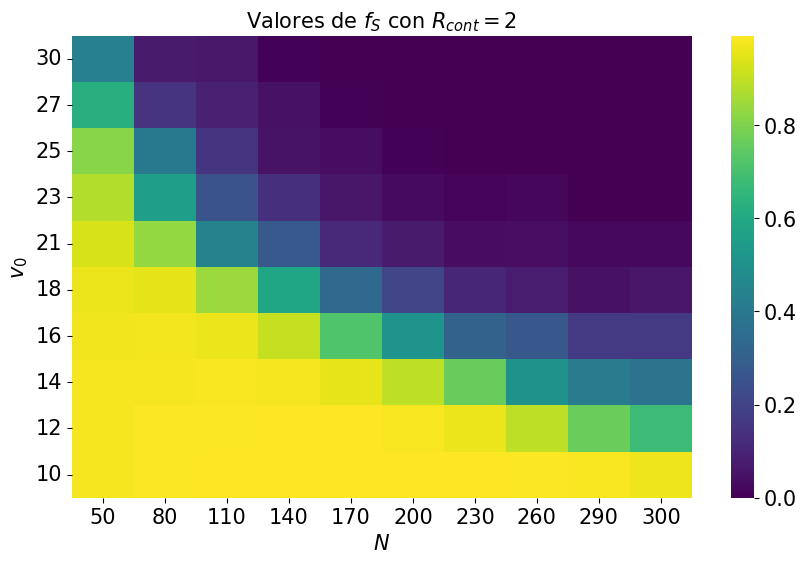

In [15]:
dataheatmap_sorted = dataheatmap.sort_index(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
heatmap=sns.heatmap(dataheatmap_sorted, cmap='viridis', vmin=0)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
plt.xlabel('$N$', fontsize=15)
plt.ylabel('$v_0$', fontsize=15)
plt.title('Valores de $f_S$ con $R_{cont} = 2$', fontsize = 15)
plt.yticks(rotation=0, fontsize=15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.savefig('fS_original_rcont2.svg', format = 'svg')
plt.show()

# Visualización de los datos originales: Heatmap para $R_{cont} = 3$

In [21]:
dataf = data[data['Rcont'] == 3]
dataf['N'] = dataf['N'].round(decimals=1)
dataf['V0'] = dataf['V0'].round(decimals=1)
dataf = dataf.sort_values(by='V0', ascending=False) #V0 invertido
dataheatmap = dataf.pivot_table(values='fI_average', index='V0', columns='N')
dataheatmap

N,50,80,110,140,170,200,230,260,290,300
V0,,,,,,,,,,
10,0.113131,0.185873,0.252219,0.331412,0.408620,0.505595,0.611989,0.700864,0.735546,0.740567
12,0.157750,0.221456,0.285256,0.373917,0.459495,0.538532,0.626195,0.703145,0.735416,0.739792
14,0.194051,0.264539,0.328262,0.407797,0.476546,0.568725,0.644358,0.713621,0.743846,0.741947
16,0.239201,0.307627,0.371343,0.436184,0.505765,0.586282,0.661091,0.723984,0.745221,0.745918
18,0.278450,0.351267,0.397053,0.457637,0.533407,0.606078,0.670328,0.721088,0.745536,0.745509
21,0.306516,0.371132,0.425971,0.484942,0.547310,0.614295,0.674106,0.729211,0.742656,0.746739
23,0.336519,0.402415,0.444935,0.500216,0.561188,0.622226,0.689596,0.728323,0.745905,0.747484
25,0.359195,0.415616,0.471571,0.513011,0.570142,0.628225,0.688153,0.728552,0.742067,0.747587
27,0.373183,0.430909,0.478801,0.525461,0.587334,0.635189,0.694377,0.734662,0.747263,0.748961


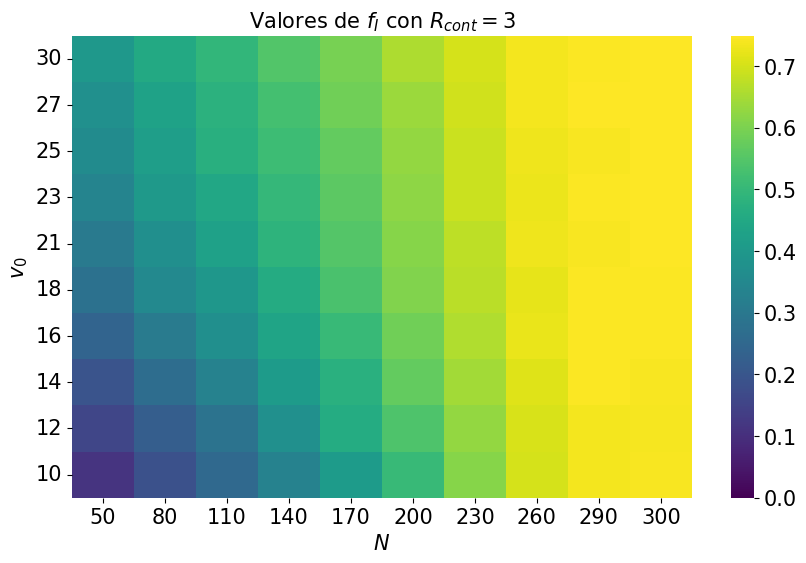

In [22]:
dataheatmap_sorted = dataheatmap.sort_index(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
heatmap=sns.heatmap(dataheatmap_sorted, cmap='viridis', vmin=0)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
plt.xlabel('$N$', fontsize=15)
plt.ylabel('$v_0$', fontsize=15)
plt.title('Valores de $f_I$ con $R_{cont} = 3$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(rotation=0, fontsize=15)
plt.savefig('fI_original_rcont3.svg', format='svg')
plt.show()

In [23]:
dataf = data[data['Rcont'] == 3]
dataf['N'] = dataf['N'].round(decimals=1)
dataf['V0'] = dataf['V0'].round(decimals=1)
dataf = dataf.sort_values(by='V0', ascending=False) #V0 invertido
dataheatmap = dataf.pivot_table(values='fS_average', index='V0', columns='N')
dataheatmap

N,50,80,110,140,170,200,230,260,290,300
V0,,,,,,,,,,
10,0.4258,0.123375,0.038909,0.009214,0.001824,0.00025,0.0,0.0,0.0,0.0
12,0.2114,0.064000,0.018909,0.002571,0.000412,0.00015,0.0,0.0,0.0,0.0
14,0.1434,0.037375,0.004364,0.000786,0.000294,0.00000,0.0,0.0,0.0,0.0
16,0.0632,0.009875,0.000909,0.000643,0.000000,0.00000,0.0,0.0,0.0,0.0
18,0.0528,0.003250,0.000727,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
21,0.0360,0.002375,0.000364,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
23,0.0158,0.000500,0.000091,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
25,0.0056,0.000250,0.000091,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
27,0.0132,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0


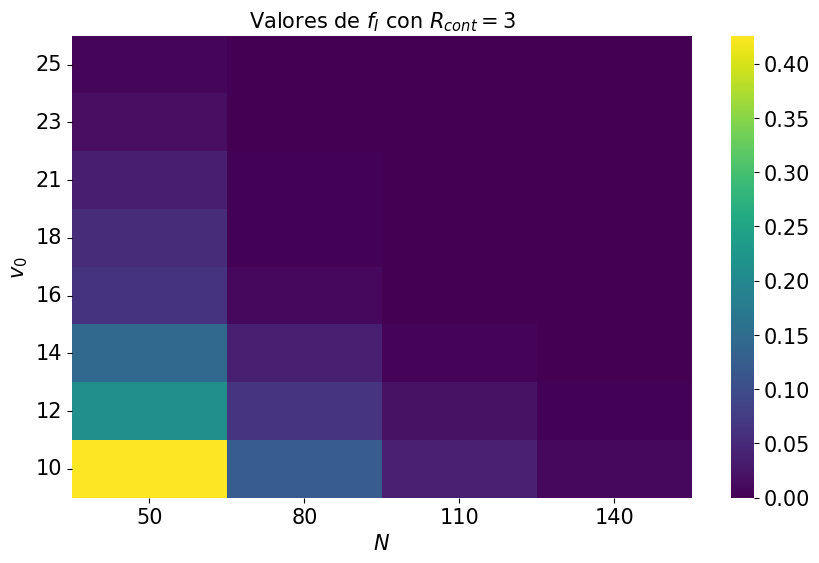

In [24]:
dataheatmap = dataheatmap.loc[10:25, 50:150]
dataheatmap_sorted = dataheatmap.sort_index(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
heatmap=sns.heatmap(dataheatmap_sorted, cmap='viridis', vmin=0)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
plt.xlabel('$N$', fontsize=15)
plt.ylabel('$v_0$', fontsize=15)
plt.title('Valores de $f_I$ con $R_{cont} = 3$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(rotation=0, fontsize=15)
plt.savefig('fS_original_rcont3.svg', format='svg')
plt.show()